<a href="https://colab.research.google.com/github/HVMZV/Springboard/blob/master/Storytelling%20Project/FIFA_ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FIFA Ranking Takeaways

The following dataset is from FIFA's ranking of international teams since 1992. It contains all available FIFA men's international soccer rankings from August 1993 to April 2018. Rankings and points have been scraped from the official FIFA website.

_Aim:_ to understand if being a top-seeded or ranked team meant a team truly was favorite to win the World Cup or their corresponding continent's confederation cup, and whether a team that experienced the greatest rise in rating performed significantly better at tournaments participated in.

_Assumption:_ Only years that will be looked at are those in which there were international tournaments played, starting from 2011 onwards. Only one tournament for the 3 following confederations (**AFC, UEFA, FIFA**) will be selected from the 2011 to most current date will be selected. 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import datetime
from scipy.stats import rankdata

In [10]:
url = 'fifa_ranking.csv'
fifa_ranking = pd.read_csv(url)

In [11]:
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [12]:
fifa_ranking.head(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [13]:
fifa_ranking.country_full.unique()

array(['Germany', 'Italy', 'Switzerland', 'Sweden', 'Argentina',
       'Republic of Ireland', 'Russia', 'Brazil', 'Norway', 'Denmark',
       'England', 'France', 'Spain', 'Mexico', 'RCS', 'Netherlands',
       'Nigeria', 'Belgium', 'Colombia', 'Poland', 'Romania', 'Uruguay',
       'Portugal', 'Cameroon', 'Zambia', 'Egypt', 'Wales', 'USA',
       "Côte d'Ivoire", 'Scotland', 'Tunisia', 'Greece', 'Morocco',
       'Algeria', 'Ecuador', 'Korea Republic', 'Bulgaria', 'Austria',
       'Costa Rica', 'Northern Ireland', 'Honduras', 'Hungary', 'Japan',
       'Saudi Arabia', 'China PR', 'Canada', 'Finland', 'Ghana', 'Chile',
       'Zimbabwe', 'Qatar', 'Australia', 'Iceland', 'IR Iran',
       'United Arab Emirates', 'Yugoslavia', 'Iraq', 'Senegal', 'Bolivia',
       'Kuwait', 'Korea DPR', 'El Salvador', 'Turkey', 'Gabon', 'Guinea',
       'Thailand', 'Paraguay', 'Malawi', 'Israel', 'Peru', 'Zaire',
       'Cyprus', 'Singapore', 'Mali', 'Malaysia', 'Bermuda', 'Niger',
       'Syria', 'Bahr

In [14]:
fifa_ranking.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [15]:
fifa_ranking['rank_date'] = pd.to_datetime(fifa_ranking['rank_date'])
fifa_ranking = fifa_ranking[~(fifa_ranking['rank_date']< '2010-12-31')]
fifa_ranking.head(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
38931,1,Spain,ESP,0.0,1887,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2011-01-12
38932,2,Netherlands,NED,0.0,1723,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2011-01-12


In [16]:
fifa_ranking['country_full'].value_counts()

Sudan                  127
Togo                    90
France                  90
Nepal                   90
Congo DR                90
                      ... 
Papua New Guinea        88
São Tomé e Príncipe     80
South Sudan             71
Kosovo                  24
Gibraltar               22
Name: country_full, Length: 211, dtype: int64

**Takeaway**: 211 countries total in the spreadsheet.

## First major international tournament in 2011: 
The **2011 AFC Asian Cup**. It started on January 7, 2011.

In [17]:
afc_teams = fifa_ranking.confederation == 'AFC'
afc_ranking = fifa_ranking[afc_teams].copy().reset_index(drop=True)

The first ranking date in 2011 was on January 12 2011, so this date will be used when determining top-seeded team and most improved teams.

Teams that qualified for the cup were: ***Qatar, Iraq, Saudi Arabia, South Korea, India, Uzbekistan, Syria, IR Iran, China PR, Japan, Bahrain, United Arab Emirates, North Korea, Australia, Kuwait, Jordan.***

In [18]:
afc_cup = (['Qatar', 'Iraq', 'Saudi Arabia', 'South Korea', 'India', 'Uzbekistan', 'Syria', 'IR Iran', 'China PR', 
                   'Japan', 'Bahrain', 'United Arab Emirates', 'North Korea', 'Australia', 'Kuwait', 'Jordan'])

afc_ranking = afc_ranking[afc_ranking.country_full.isin(afc_cup)]
afc_ranking_11 = afc_ranking[afc_ranking["rank_date"] == '2011-01-12']

# Change index to start at 1
afc_ranking_11.index += 1 
afc_ranking_11.index

Int64Index([1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 16, 25], dtype='int64')

### Top 4 ranked teams are:

In [19]:
afc_ranking_11.head(4)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
1,26,Australia,AUS,0.0,816,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFC,2011-01-12
2,29,Japan,JPN,0.0,776,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFC,2011-01-12
4,65,IR Iran,IRN,0.0,496,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFC,2011-01-12
5,78,Saudi Arabia,KSA,0.0,429,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFC,2011-01-12


***Actual performance:***

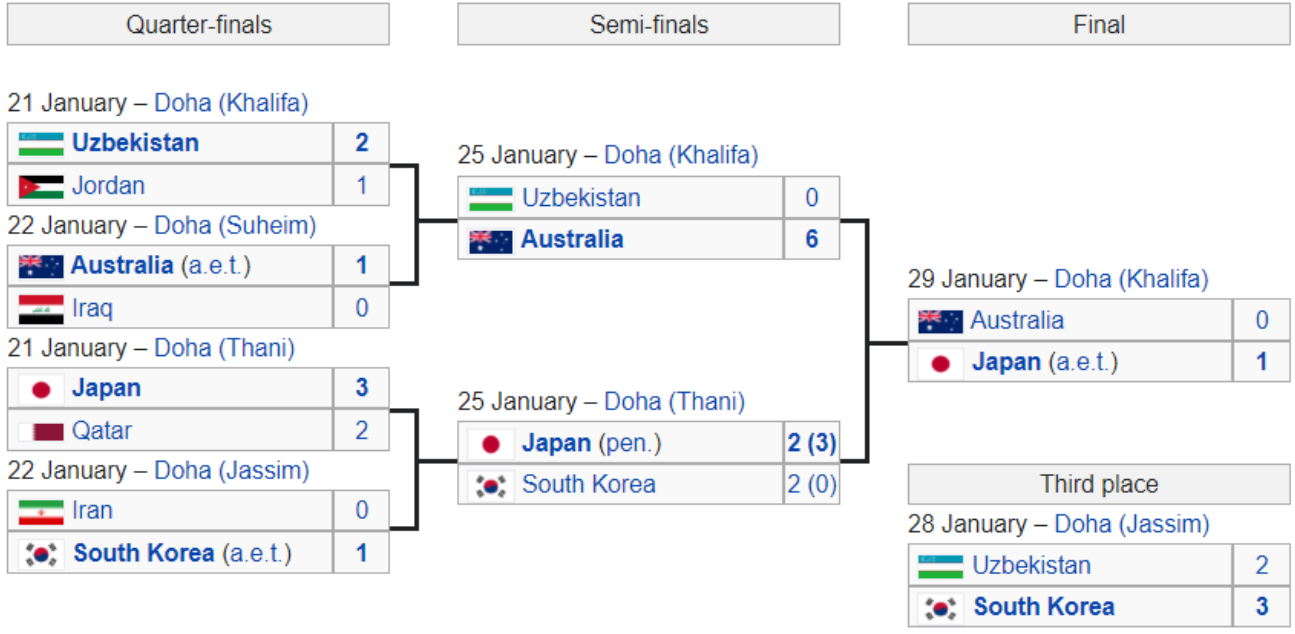

In this instance, the top 2 seeded teams did indeed live up to expectation and make it to the final, the 3rd highest ranked team did make it past the group stages but were eliminated in the first knockout round, falling below expectations. The 4th highest ranked team did not even qualify past the group stages. 50% of the top 4 seeded teams met expectations, one fell below expectations and the other were abject and fell well below teams that on paper were significantly weaker.

**Ending position of top 4 teams:**

In [20]:
afc_cul_ranking_11 = afc_ranking_11.copy(deep=True)

# End rankings for top 4
afc_top_4_end_ranking = [['Australia',2],['Japan',1],['IR Iran',7],['Saudi Arabia',12]]
end_ranking = pd.DataFrame(afc_top_4_end_ranking)
end_ranking.columns = ['country_full', 'end_rank']

# Drop unneeded columns
afc_cul_ranking_11.drop(afc_cul_ranking_11.iloc[:, 3:13], inplace = True, axis = 1)

afc_cul_ranking_11['pre_tournament_ranking'] = afc_cul_ranking_11['rank'].rank(ascending=True)

# Merge files to create one with initial ranking and end ranking
afc_cul_ranking_11 = afc_cul_ranking_11.merge(end_ranking, on='country_full', how='left')
afc_cul_ranking_11 = afc_cul_ranking_11.drop(['rank'], axis = 1)
afc_cul_ranking_11.dropna(subset = ["end_rank"], inplace=True)
afc_cul_ranking_11.head(4)

,country_full,country_abrv,three_year_ago_weighted,confederation,rank_date,pre_tournament_ranking,end_rank
0,Australia,AUS,0.0,AFC,2011-01-12,1.0,2.0
1,Japan,JPN,0.0,AFC,2011-01-12,2.0,1.0
2,IR Iran,IRN,0.0,AFC,2011-01-12,3.0,7.0
3,Saudi Arabia,KSA,0.0,AFC,2011-01-12,4.0,12.0


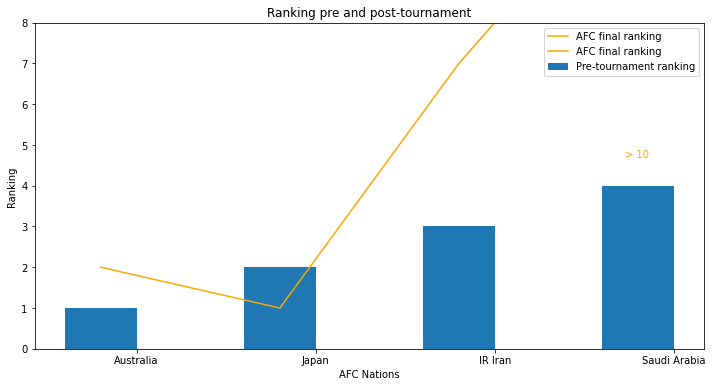

In [135]:
plt.rcParams["figure.figsize"] = (12, 6)

X_axis = np.arange(len(afc_cul_ranking_11.country_full))
  
plt.bar(X_axis - 0.2, afc_cul_ranking_11.pre_tournament_ranking, 0.4, label = 'Pre-tournament ranking')
plt.plot(X_axis - 0.2, afc_cul_ranking_11.end_rank, 0.4, label = 'AFC final ranking', color="orange")

plt.annotate('> 10', xy=(625, 230), xycoords='figure points',color="orange")

plt.xticks(X_axis, afc_cul_ranking_11.country_full)
plt.xlabel("AFC Nations")
plt.ylabel("Ranking")
plt.title("Ranking pre and post-tournament")
plt.ylim((0,8))

plt.legend()

In [22]:
'''afc_cul_ranking_11.sort_values(afc_cul_ranking_11.end_rank, inplace=True)

fig = plt.figure()
ax = fig.add_subplot(111)
# increase space below subplot
fig.subplots_adjust(bottom=0.3)
bars = ax.bar(afc_cul_ranking_11.country_full, afc_cul_ranking_11.pre_tournament_ranking.max()-afc_cul_ranking_11.pre_tournament_ranking, 
              bottom=afc_cul_ranking_11.pre_tournament_ranking, width=0.8, )

# invert y axis
ax.invert_yaxis()

ax.tick_params(axis=afc_cul_ranking_11.country_full, rotation=90, labelsize=14)

for bar in bars:
    bar.sticky_edges.y[:] = [afc_cul_ranking_11.end_rank.values.max()]
ax.autoscale()
plt.show()'''

'afc_cul_ranking_11.sort_values(afc_cul_ranking_11.end_rank, inplace=True)\n\nfig = plt.figure()\nax = fig.add_subplot(111)\n# increase space below subplot\nfig.subplots_adjust(bottom=0.3)\nbars = ax.bar(afc_cul_ranking_11.country_full, afc_cul_ranking_11.pre_tournament_ranking.max()-afc_cul_ranking_11.pre_tournament_ranking, \n              bottom=afc_cul_ranking_11.pre_tournament_ranking, width=0.8, )\n\n# invert y axis\nax.invert_yaxis()\n\nax.tick_params(axis=afc_cul_ranking_11.country_full, rotation=90, labelsize=14)\n\nfor bar in bars:\n    bar.sticky_edges.y[:] = [afc_cul_ranking_11.end_rank.values.max()]\nax.autoscale()\nplt.show()'

### Top 4 most improved teams are:

In [23]:
afc_ranking_11 = afc_ranking_11.sort_values(["rank_change"], ascending = False)
afc_ranking_11.head(4)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
6,79,China PR,CHN,0.0,389,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFC,2011-01-12
12,105,Qatar,QAT,0.0,261,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFC,2011-01-12
9,99,Kuwait,KUW,0.0,319,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFC,2011-01-12
10,102,United Arab Emirates,UAE,0.0,302,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFC,2011-01-12


Qatar was the only team that had improved quite a bit and this is reflected by them being the team from the most-improved list that qualified past the group stage, but ultimately made it no further than the quarter finals.

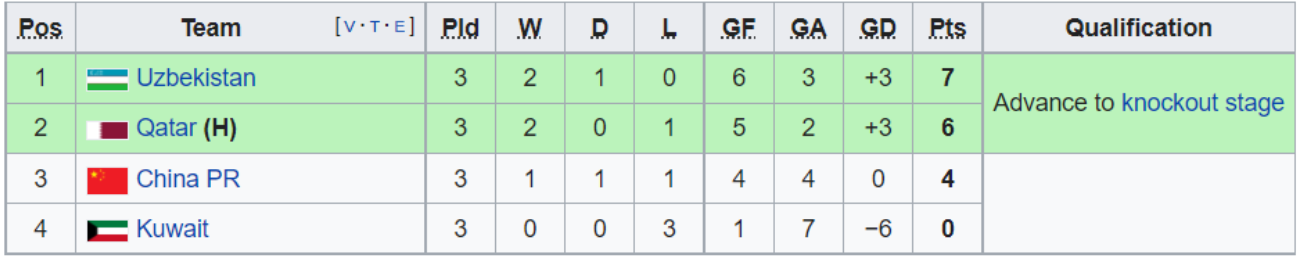

It must be said that 3 of the above teams were placed in the same group, meaning in the best case scenario only 3 of the 4 would have qualified past the group stages no matter what.

**Ending position of top 4 most-improved teams:**

In [24]:
# End rankings for top 4 most improved
afc_most_imp_4_end_ranking = [['Qatar',5],['China PR',12],['Kuwait',12],['United Arab Emirates',12]]
end_ranking_2 = pd.DataFrame(afc_most_imp_4_end_ranking)
end_ranking_2.columns = ['country_full', 'end_rank']

# Drop unneeded columns
afc_ranking_11.drop(afc_ranking_11.iloc[:, 3:5], inplace = True, axis = 1)
afc_ranking_11.drop(afc_ranking_11.iloc[:, 4:15], inplace = True, axis = 1)

# Merge files to create one with initial ranking and end ranking
afc_ranking_11 = afc_ranking_11.merge(end_ranking_2, on='country_full', how='left')
afc_ranking_11 = afc_ranking_11.drop(['rank'], axis = 1)
afc_ranking_11.dropna(subset = ["end_rank"], inplace=True)

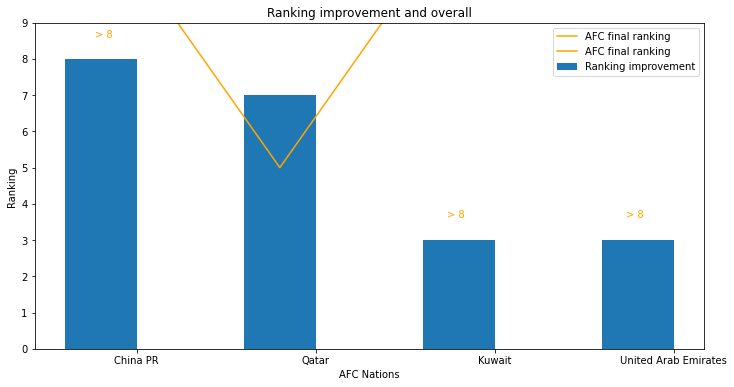

In [131]:
plt.rcParams["figure.figsize"] = (12, 6)

X_axis = np.arange(len(afc_ranking_11.country_full))
  
plt.bar(X_axis - 0.2, afc_ranking_11.rank_change, 0.4, label = 'Ranking improvement')
plt.plot(X_axis - 0.2, afc_ranking_11.end_rank, 0.4, label = 'AFC final ranking', color="orange")

plt.annotate('> 8', xy=(95, 350), xycoords='figure points',color="orange")
plt.annotate('> 8', xy=(447, 170), xycoords='figure points',color="orange")
plt.annotate('> 8', xy=(626, 170), xycoords='figure points',color="orange")

plt.xticks(X_axis, afc_ranking_11.country_full)
plt.xlabel("AFC Nations")
plt.ylabel("Ranking")
plt.title("Ranking improvement and overall")
plt.ylim((0,9))
plt.legend()

## UEFA Euro 2012: 
The **UEFA Euro 2012** started on June 8, 2012.

In [26]:
fifa_ranking['rank_date'] = pd.to_datetime(fifa_ranking['rank_date'])
fifa_ranking = fifa_ranking[~(fifa_ranking['rank_date']< '2011-12-31')]

In [27]:
uefa_teams = fifa_ranking.confederation == 'UEFA'
uefa_ranking = fifa_ranking[uefa_teams].copy().reset_index(drop=True)

The ranking date directly preceding the tournament is June 6, 2012. This date will be used when determining top-seeded team and most improved teams.

Teams that qualified for the cup were:  ***Poland, Ukraine, Germany, Italy, Netherlands, Spain, England, Russia, France, Greece, Denmark, Sweden, Croatia, Czech Republic, Portugal, Republic of Ireland.***

In [28]:
euro_cup = (['Poland', 'Ukraine', 'Germany', 'Italy', 'Netherlands', 'Spain', 'England', 'Russia', 'France', 'Greece', 'Denmark',
            'Sweden', 'Croatia', 'Czech Republic', 'Portugal', 'Republic of Ireland'])

uefa_ranking = uefa_ranking[uefa_ranking.country_full.isin(euro_cup)]
uefa_ranking_11 = uefa_ranking[uefa_ranking["rank_date"] == '2012-06-06']

### Top 4 ranked teams are:

In [29]:
uefa_ranking_11.head(4)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
265,1,Spain,ESP,1456.10,1442,0,485.13,485.13,1094.00,547.00,655.54,196.66,1136.57,227.31,UEFA,2012-06-06
266,3,Germany,GER,1288.30,1345,-1,555.23,555.23,941.81,470.90,427.84,128.35,669.10,133.82,UEFA,2012-06-06
267,4,Netherlands,NED,1234.05,1207,0,329.59,329.59,1159.71,579.85,501.17,150.35,871.32,174.26,UEFA,2012-06-06
268,6,England,ENG,1144.64,1132,1,541.13,541.13,656.60,328.30,481.08,144.32,654.45,130.89,UEFA,2012-06-06


***Actual performance:***

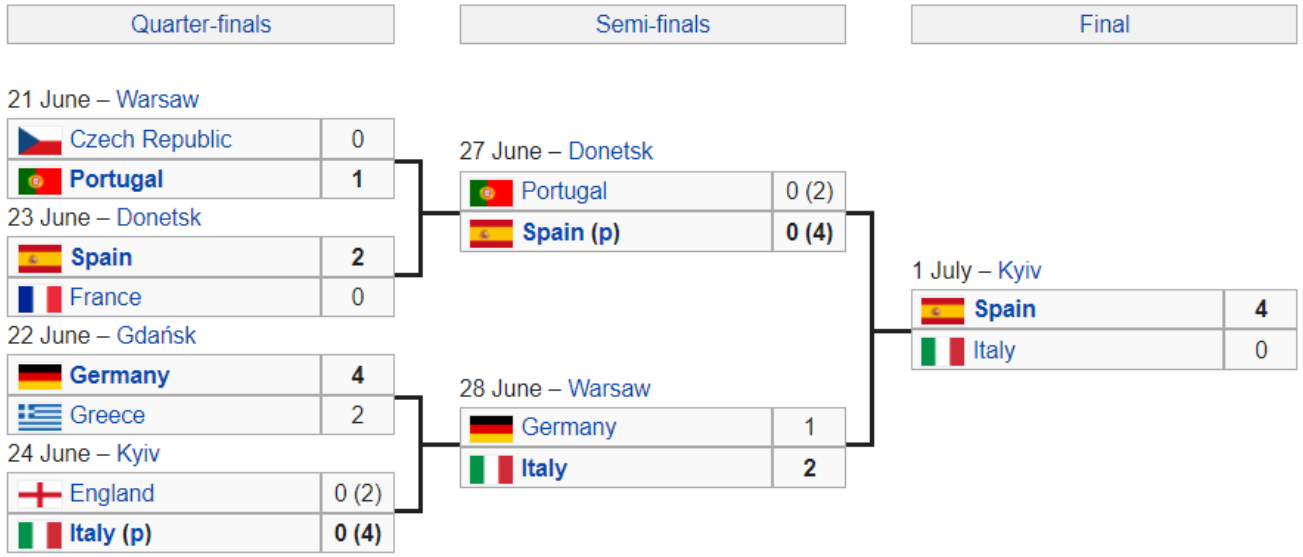

In this instance, the top seeded team not only made it to the final but won, the 2nd highest ranked team made (ranked 3rd worldwide) made it to the semis, which is respectable but ultimately fell short. The 4th seeded team made it to the knockout round, but still fell short. The 3rd seeded team under performed massively. While a team's ranking may be informative, it is by no means the only indiciation of a team's possibility to win a tournament. It does lay credence to the fact that the top teams are highly likely to advance past group stages, where the weakest teams typically are weeded out.

**Ending position of top 4 teams:**

In [30]:
uefa_cul_ranking_11 = uefa_ranking_11.copy(deep=True)

# End rankings for top 4
afc_top_4_end_ranking = [['Spain',1],['Germany',3],['Netherlands',16],['England',5]]
end_ranking = pd.DataFrame(afc_top_4_end_ranking)
end_ranking.columns = ['country_full', 'end_rank']

# Drop unneeded columns
uefa_cul_ranking_11.drop(uefa_cul_ranking_11.iloc[:, 3:16], inplace = True, axis = 1)

uefa_cul_ranking_11['pre_tournament_ranking'] = uefa_cul_ranking_11['rank'].rank(ascending=True)

# Merge files to create one with initial ranking and end ranking
uefa_cul_ranking_11 = uefa_cul_ranking_11.merge(end_ranking, on='country_full', how='left')
uefa_cul_ranking_11 = uefa_cul_ranking_11.drop(['rank'], axis = 1)
uefa_cul_ranking_11.dropna(subset = ["end_rank"], inplace=True)
uefa_cul_ranking_11.head(4)

,country_full,country_abrv,pre_tournament_ranking,end_rank
0,Spain,ESP,1.0,1.0
1,Germany,GER,2.0,3.0
2,Netherlands,NED,3.0,16.0
3,England,ENG,4.0,5.0


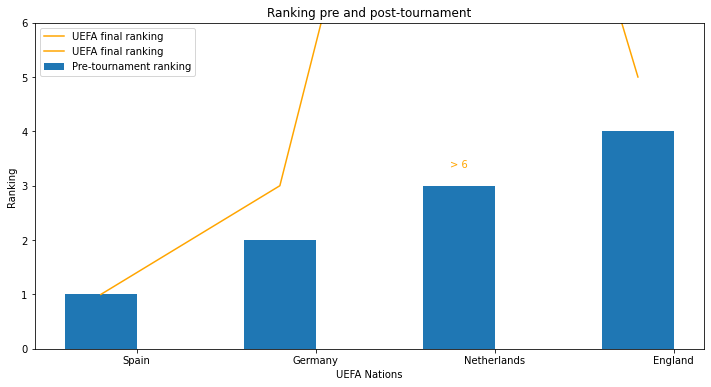

In [138]:
plt.rcParams["figure.figsize"] = (12, 6)

X_axis = np.arange(len(uefa_cul_ranking_11.country_full))
  
plt.bar(X_axis - 0.2, uefa_cul_ranking_11.pre_tournament_ranking, 0.4, label = 'Pre-tournament ranking')
plt.plot(X_axis - 0.2, uefa_cul_ranking_11.end_rank, 0.4, label = 'UEFA final ranking', color="orange")

plt.annotate('> 6', xy=(450, 220), xycoords='figure points',color="orange")  

plt.xticks(X_axis, uefa_cul_ranking_11.country_full)
plt.xlabel("UEFA Nations")
plt.ylabel("Ranking")
plt.title("Ranking pre and post-tournament")
plt.ylim((0,6))
plt.legend()

### Top 4 most improved teams are:

In [32]:
uefa_ranking_11 = uefa_ranking_11.sort_values(["rank_change"], ascending = False)
uefa_ranking_11.head(4)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
296,62,Poland,POL,518.24,514,3,289.68,289.68,217.54,108.77,204.83,61.45,291.70,58.34,UEFA,2012-06-06
274,14,France,FRA,963.75,938,2,516.79,516.79,452.01,226.01,442.33,132.70,441.24,88.25,UEFA,2012-06-06
268,6,England,ENG,1144.64,1132,1,541.13,541.13,656.60,328.30,481.08,144.32,654.45,130.89,UEFA,2012-06-06
270,9,Denmark,DEN,1019.45,1069,1,572.32,572.32,507.97,253.98,275.96,82.79,551.78,110.36,UEFA,2012-06-06


The below shows that although Denmark didn't qualify from their group, they were also placed in the most difficult group but managed to come out of it with some credit, as they finished above the 3rd highest ranking team going into the tournament. 

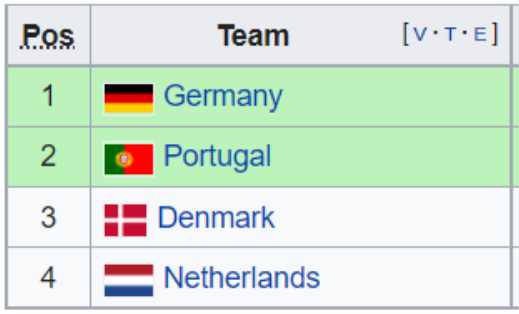

While Polance had the highest rank increase from the last rankings, their overall low ranking showed as they finished last in their group.

As for France and England, both managed to make it out of their group, in which they were pitted against one another. 

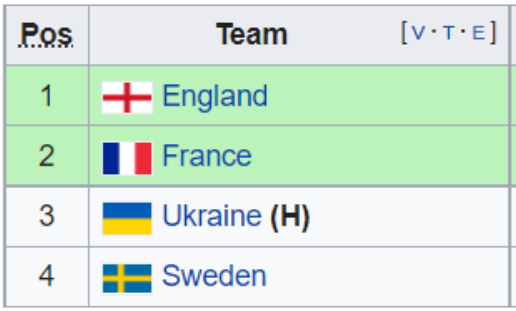

While increases in rankings aren't an indicator of a team winning, it is an indicator of a team's improved performance and should mean a team performs relatively strongly.

**Ending position of top 4 most-improved teams:**

In [33]:
# End rankings for top 4 most improved
uefa_most_imp_4_end_ranking = [['Poland',15],['France',8],['England',5],['Denmark',12]]
end_ranking_2 = pd.DataFrame(uefa_most_imp_4_end_ranking)
end_ranking_2.columns = ['country_full', 'end_rank']

# Drop unneeded columns
uefa_ranking_11.drop(uefa_ranking_11.iloc[:, 3:5], inplace = True, axis = 1)
uefa_ranking_11.drop(uefa_ranking_11.iloc[:, 4:15], inplace = True, axis = 1)

# Merge files to create one with initial ranking and end ranking
uefa_ranking_11 = uefa_ranking_11.merge(end_ranking_2, on='country_full', how='left')
uefa_ranking_11 = uefa_ranking_11.drop(['rank'], axis = 1)
uefa_ranking_11.dropna(subset = ["end_rank"], inplace=True)

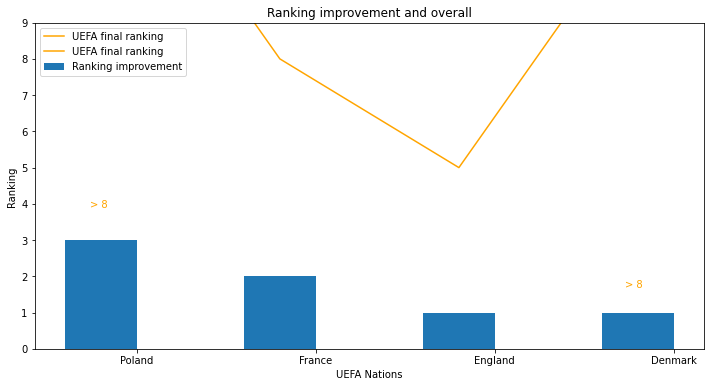

In [149]:
plt.rcParams["figure.figsize"] = (12, 6)

X_axis = np.arange(len(uefa_ranking_11.country_full))
  
plt.bar(X_axis - 0.2, uefa_ranking_11.rank_change, 0.4, label = 'Ranking improvement')
plt.plot(X_axis - 0.2, uefa_ranking_11.end_rank, 0.4, label = 'UEFA final ranking', color="orange")

plt.annotate('> 8', xy=(90, 180), xycoords='figure points',color="orange")
plt.annotate('> 8', xy=(625, 100), xycoords='figure points',color="orange")

plt.xticks(X_axis, uefa_ranking_11.country_full)
plt.xlabel("UEFA Nations")
plt.ylabel("Ranking")
plt.title("Ranking improvement and overall")
plt.ylim((0,9))
plt.legend()

## World Cup 2014: 
The **2014 World Cup** started on June 12, 2014.

In [35]:
fifa_ranking['rank_date'] = pd.to_datetime(fifa_ranking['rank_date'])
fifa_ranking = fifa_ranking[~(fifa_ranking['rank_date']< '2013-12-31')]

In [36]:
world_cup = (['Brazil', 'Croatia', 'Mexico', 'Cameroon', 'Spain', 'Netherlands', 'Chile', 'Australia','Colombia', 'Greece', 
              'Ivory Coast', 'Japan', 'Uruguay', 'Costa Rica', 'England', 'Italy', 'Switzerland', 'Ecuador', 'France', 
              'Honduras', 'Argentina', 'Bosnia and Herzegovina', 'Iran', 'Nigeria', 'Germany', 'Portugal', 'Ghana', 'United States', 
              'Belgium', 'Algeria', 'Russia', 'South Korea'])

wc_ranking = fifa_ranking[fifa_ranking.country_full.isin(world_cup)]
wc_ranking_11 = wc_ranking[wc_ranking["rank_date"] == '2014-06-05']

### Top 4 ranked teams are:

In [37]:
wc_ranking_11.head(4)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
47499,1,Spain,ESP,1484.58,1460,0,664.00,664.00,912.48,456.24,485.13,145.54,1094.00,218.80,UEFA,2014-06-05
47500,2,Germany,GER,1299.59,1340,0,559.35,559.35,770.63,385.31,555.23,166.57,941.81,188.36,UEFA,2014-06-05
47501,3,Brazil,BRA,1242.23,1210,1,845.26,845.26,272.30,136.15,449.00,134.70,630.60,126.12,CONMEBOL,2014-06-05
47502,4,Portugal,POR,1189.40,1245,-1,637.29,637.29,624.60,312.30,430.33,129.10,553.59,110.72,UEFA,2014-06-05


***Actual performance:***

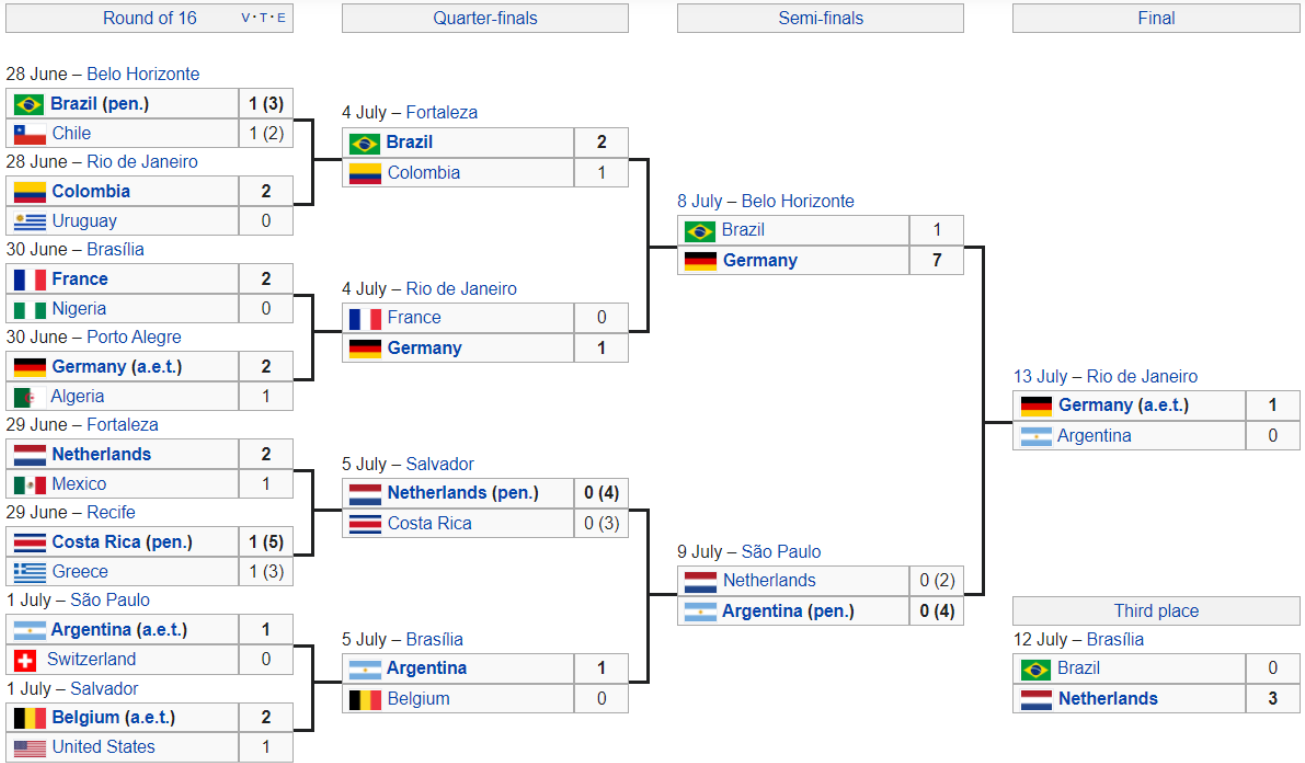

Once again, one of the top 2 ranked teams made it to the final and won, while the 3rd ranked team made it to the semis, ultimately finishing in fourth place. The other two teams did not even make it to the knockout rounds, meaning both teams heavily underperformed. So far, the emerging them is that the top ranked teams have <50% chance of advancing to the semis or further.

**Ending position of top 4 teams:**

In [38]:
wc_cul_ranking_11 = wc_ranking_11.copy(deep=True)

# End rankings for top 4
wc_top_4_end_ranking = [['Spain',24],['Germany',1],['Brazil',4],['Portugal',20]]
end_ranking = pd.DataFrame(wc_top_4_end_ranking)
end_ranking.columns = ['country_full', 'end_rank']

# Drop unneeded columns
wc_cul_ranking_11.drop(wc_cul_ranking_11.iloc[:, 3:16], inplace = True, axis = 1)

wc_cul_ranking_11['pre_tournament_ranking'] = wc_cul_ranking_11['rank'].rank(ascending=True)

# Merge files to create one with initial ranking and end ranking
wc_cul_ranking_11 = wc_cul_ranking_11.merge(end_ranking, on='country_full', how='left')
wc_cul_ranking_11 = wc_cul_ranking_11.drop(['rank'], axis = 1)
wc_cul_ranking_11.dropna(subset = ["end_rank"], inplace=True)

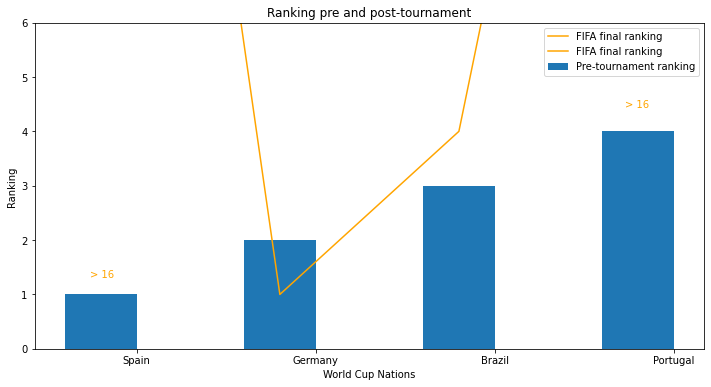

In [159]:
plt.rcParams["figure.figsize"] = (12, 6)

X_axis = np.arange(len(wc_cul_ranking_11.country_full))
  
plt.bar(X_axis - 0.2, wc_cul_ranking_11.pre_tournament_ranking, 0.4, label = 'Pre-tournament ranking')
plt.plot(X_axis - 0.2, wc_cul_ranking_11.end_rank, 0.4, label = 'World Cup final ranking', color="orange")

plt.annotate('> 16', xy=(90, 110), xycoords='figure points',color="orange")
plt.annotate('> 16', xy=(625, 280), xycoords='figure points',color="orange")
  
plt.xticks(X_axis, wc_cul_ranking_11.country_full)
plt.xlabel("World Cup Nations")
plt.ylabel("Ranking")
plt.title("Ranking pre and post-tournament")
plt.ylim((0,6))
plt.legend()

### Top 4 most improved teams are:

In [40]:
wc_ranking_11 = wc_ranking_11.sort_values(["rank_change"], ascending = False)
wc_ranking_11.head(7)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
47526,28,Costa Rica,CRC,762.48,748,6,465.28,465.28,387.67,193.84,200.31,60.09,216.35,43.27,CONCACAF,2014-06-05
47519,21,Bosnia and Herzegovina,BIH,872.69,795,4,352.99,352.99,648.81,324.41,441.00,132.30,314.98,63.00,UEFA,2014-06-05
47520,22,Algeria,ALG,857.52,795,3,508.48,508.48,368.98,184.49,409.79,122.94,208.08,41.62,CAF,2014-06-05
47503,5,Argentina,ARG,1174.50,1178,2,512.98,512.98,702.07,351.04,582.81,174.84,678.21,135.64,CONMEBOL,2014-06-05
47504,6,Switzerland,SUI,1148.57,1161,2,640.01,640.01,594.58,297.29,411.83,123.55,438.60,87.72,UEFA,2014-06-05
47516,18,Croatia,CRO,903.47,871,2,280.24,280.24,712.29,356.14,510.10,153.03,570.30,114.06,UEFA,2014-06-05
47524,26,Ecuador,ECU,791.28,794,2,269.01,269.01,731.89,365.95,401.33,120.40,179.59,35.92,CONMEBOL,2014-06-05


Costa Rica, the team that had the greatest rank increase of 6, still had a relatively low overall ranking, yet performed expectionally, as not only did they manage to make it to the quarter-finals (only exiting to the Netherlands via penalty kicks), but topped the 'group of death' in which they overcame Uruguay, Italy, and England.

Switzerland, Algeria and Argentina also all managed to qualify to the knockouts, with Argentina making it as far as the final, where they lost to one of the clear favorites.

It seems that teams with a rank increase were able to ultimately perform well as it indicates overall that they were performing well preceding the tournament and that translated into good performances during the tournament.

**Ending position of top 4 most-improved teams:**

In [41]:
# End rankings for top 4 most improved
wc_most_imp_4_end_ranking = [['Costa Rica',5],['Bosnia and Herzegovina',25],['Algeria',11],['Argentina',2],['Switzerland',14],
                             ['Croatia',23],['Ecuador',27]]
end_ranking_2 = pd.DataFrame(wc_most_imp_4_end_ranking)
end_ranking_2.columns = ['country_full', 'end_rank']

# Drop unneeded columns
wc_ranking_11.drop(wc_ranking_11.iloc[:, 3:5], inplace = True, axis = 1)
wc_ranking_11.drop(wc_ranking_11.iloc[:, 4:15], inplace = True, axis = 1)

# Merge files to create one with initial ranking and end ranking
wc_ranking_11 = wc_ranking_11.merge(end_ranking_2, on='country_full', how='left')
wc_ranking_11 = wc_ranking_11.drop(['rank'], axis = 1)
wc_ranking_11.dropna(subset = ["end_rank"], inplace=True)

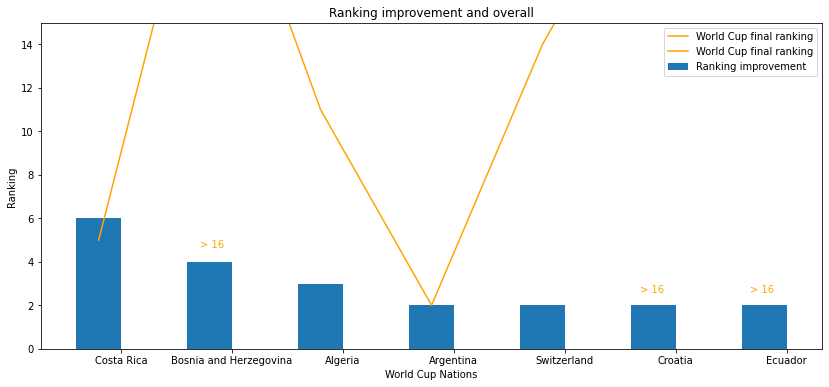

In [175]:
plt.rcParams["figure.figsize"] = (14, 6)

X_axis = np.arange(len(wc_ranking_11.country_full))
  
plt.bar(X_axis - 0.2, wc_ranking_11.rank_change, 0.4, label = 'Ranking improvement')
plt.plot(X_axis - 0.2, wc_ranking_11.end_rank, 0.4, label = 'World Cup final ranking', color="orange")

plt.annotate('> 16', xy=(200, 140), xycoords='figure points',color="orange")
plt.annotate('> 16', xy=(640, 95), xycoords='figure points',color="orange")
plt.annotate('> 16', xy=(750, 95), xycoords='figure points',color="orange")

plt.xticks(X_axis, wc_ranking_11.country_full)
plt.xlabel("World Cup Nations")
plt.ylabel("Ranking")
plt.title("Ranking improvement and overall")
plt.ylim((0,15))
plt.legend()

plt.show()

#### **Interested in knowing if I could write a code that could detect whether it's a World Cup year, a Euros year, or an AFC cup year).**